# Chapter 8

## Combining and Merging Datasets
- Database-Style DataFrame Joins
- Merging on Index
- Concatenating Along an Axis
- Combining Data with Overlap

## Combining and Merging Datasets
Data contained in pandas objects can be combined together in a number of ways:
- **pandas.merge** connects rows in DataFrames based on one or more keys. This
will be familiar to users of SQL or other relational databases, as it implements
database join operations.

- **pandas.concat** concatenates or “stacks” together objects along an axis.

- The **combine_first** instance method enables splicing together overlapping data
to fill in missing values in one object with values from another.

## Database-Style DataFrame Joins

In [4]:
import pandas as pd
import numpy as np
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [5]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd','b'],'data2': range(4)})
df2

,key,data2
0,a,0
1,b,1
2,d,2
3,b,3


In [6]:
# many to one join
pd.merge(df1, df2) #Note that I didn’t specify which column to join on. If that information is not specified, merge uses the overlapping column names as the keys.

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [7]:
pd.merge(df2, df1)

,key,data2,data1
0,a,0,2
1,a,0,4
2,a,0,5
3,b,1,0
4,b,1,1
5,b,1,6
6,b,3,0
7,b,3,1
8,b,3,6


In [8]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,6,1
5,b,6,3
6,a,2,0
7,a,4,0
8,a,5,0


In [9]:
#If the column names are different in each object, you can specify them separately:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],'data1': range(7)})
df3

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [10]:
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],'data2': range(3)})
df4

,rkey,data2
0,a,0
1,b,1
2,d,2


In [11]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey',how='outer') #outer union , inner# intesection

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,c,3.0,NaN,NaN
7,NaN,NaN,d,2.0


## Many To Many Join

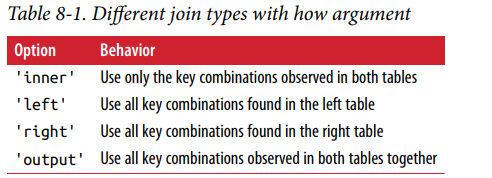
- Many-to-many joins form the Cartesian product of the rows. 
- Suppose there were three 'b' rows in the left DataFrame and two in the right one, there are six 'b' rows in the result. 
- The join method only affects the distinct key values appearing in the result.
- The default merge method is to intersect the join keys, you can instead form the
union of them with an outer join

In [12]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],'data1': range(6)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [13]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],'data2': range(5)})
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [14]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [16]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [17]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [15]:
pd.merge(df1, df2, on='key', how='right')

,key,data1,data2
0,b,0.0,1
1,b,1.0,1
2,b,5.0,1
3,b,0.0,3
4,b,1.0,3
5,b,5.0,3
6,a,2.0,0
7,a,4.0,0
8,a,2.0,2
9,a,4.0,2


In [18]:
pd.merge(df1, df2, on='key', how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [19]:
pd.merge(df1, df2, on='key', how='outer')

,key,data1,data2
0,b,0.0,1.0
1,b,0.0,3.0
2,b,1.0,1.0
3,b,1.0,3.0
4,b,5.0,1.0
5,b,5.0,3.0
6,a,2.0,0.0
7,a,2.0,2.0
8,a,4.0,0.0
9,a,4.0,2.0


- To merge with multiple keys, pass a list of column names
- To determine which key combinations will appear in the result depending on the choice of merge method, think of the multiple keys as forming an array of tuples to be used as a single join key (even though it’s not actually implemented that way)

In [28]:
left = pd.DataFrame({'userId': ['foo', 'foo', 'bar'],'userName': ['one', 'two', 'one'],'lval': [1, 2, 3]})
left

,userId,userName,lval
0,foo,one,1
1,foo,two,2
2,bar,one,3


In [29]:
right = pd.DataFrame({'userId': ['foo', 'foo', 'bar', 'bar'],'userName': ['one', 'one', 'one', 'two'],'rval': [4, 5, 6, 7]})
right

,userId,userName,rval
0,foo,one,4
1,foo,one,5
2,bar,one,6
3,bar,two,7


In [24]:
pd.merge(left, right, on=['userId','userName'],how='right')

,userId,userName,lval,rval
0,foo,one,1.0,4
1,foo,one,1.0,5
2,bar,one,3.0,6
3,bar,two,NaN,7


In [25]:
pd.merge(left, right, on=['userId','userName'],how='left')

,userId,userName,lval,rval
0,foo,one,1,4.0
1,foo,one,1,5.0
2,foo,two,2,NaN
3,bar,one,3,6.0


In [30]:
pd.merge(right,left, on=['userId','userName'],how='right')

,userId,userName,rval,lval
0,foo,one,4.0,1
1,foo,one,5.0,1
2,bar,one,6.0,3
3,foo,two,NaN,2


In [27]:
pd.merge(right,left, on=['userId','userName'],how='left')

,userId,userName,rval,lval
0,foo,one,4,1.0
1,foo,one,5,1.0
2,bar,one,6,3.0
3,bar,two,7,NaN


## Merging on Index
In some cases, the merge key(s) in a DataFrame will be found in its index. In this
case, you can pass left_index=True or right_index=True (or both) to indicate that
the index should be used as the merge key

In [31]:
left1 = pd.DataFrame({'key': ['c', 'd', 'a', 'a', 'b', 'c'],'value': range(6)})
left1

,key,value
0,c,0
1,d,1
2,a,2
3,a,3
4,b,4
5,c,5


In [32]:
right1 = pd.DataFrame({'group_val': [3.5, 7]})
right1

,group_val
0,3.5
1,7.0


In [33]:
pd.merge(left1, right1,left_index=True,right_index=True)

,key,value,group_val
0,c,0,3.5
1,d,1,7.0


In [34]:
pd.merge(left1, right1, left_index=True, right_index=True, how='outer')

,key,value,group_val
0,c,0,3.5
1,d,1,7.0
2,a,2,NaN
3,a,3,NaN
4,b,4,NaN
5,c,5,NaN


In [35]:
pd.merge(left1, right1, left_index=True, right_index=True, how='inner')

,key,value,group_val
0,c,0,3.5
1,d,1,7.0


DataFrame has a convenient join instance for merging by index. It can also be used
to combine together many DataFrame objects having the same or similar indexes but
non-overlapping columns.

In [38]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],index=['a', 'c', 'e'],columns=['Ohio', 'Nevada'])
left2

,Ohio,Nevada
a,1.0,2.0
c,3.0,4.0
e,5.0,6.0


In [39]:
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],index=['b', 'c', 'd', 'e'],columns=['Missouri', 'Alabama'])
right2

,Missouri,Alabama
b,7.0,8.0
c,9.0,10.0
d,11.0,12.0
e,13.0,14.0


In [40]:
left2.join(right2, how='inner')

,Ohio,Nevada,Missouri,Alabama
c,3.0,4.0,9.0,10.0
e,5.0,6.0,13.0,14.0


In [46]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],index=['a', 'c', 'g', 'f'],columns=['New York', 'Oregon'])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
g,11.0,12.0
f,16.0,17.0


In [42]:
result = left2.join([right2, another], how='outer')

In [43]:
result

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


In [47]:
result = left2.join([right2, another], how='inner')
result

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
c,3.0,4.0,9.0,10.0,9.0,10.0


## Combining Data with Overlap

In [48]:
df1 = pd.DataFrame({'a': [1., np.nan, 5., np.nan],'b': [np.nan, 2., np.nan, 6.],'c': range(2, 18, 4)})
df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [49]:
df2 = pd.DataFrame({'a': [5., 4., np.nan, 3., 7.],'b': [np.nan, 3., 4., 6., 8.]})
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [51]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


In [ ]:
# Example :

In [55]:
import requests
url = 'https://jsonplaceholder.typicode.com/todos/'
resp = requests.get(url)

In [56]:
resp

<Response [200]>

In [59]:
data = resp.json()
len(data)

200

In [60]:
pd.DataFrame(data)

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False
...,...,...,...,...
195,10,196,consequuntur aut ut fugit similique,True
196,10,197,dignissimos quo nobis earum saepe,True
197,10,198,quis eius est sint explicabo,True
198,10,199,numquam repellendus a magnam,True


In [61]:
new_data = pd.DataFrame(data[:3])

In [62]:
new_data

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False


In [63]:
import sqlite3

In [68]:
command = "CREATE TABLE test (id INTEGER, userName VARCHAR(20));"


In [69]:
con = sqlite3.connect('mydata2.sqlite')
con

In [71]:
con.execute(command)

OperationalError: table test already exists

In [72]:
con.commit()

In [80]:
data = [(1, 'Jonathan'),(2, 'Saqib'),(3, 'Umair'), (222,2344)]


In [81]:
stmt = "INSERT INTO test VALUES(?, ?)"
con.executemany(stmt, (data))
con.commit()

In [82]:
data

[(1, 'Jonathan'), (2, 'Saqib'), (3, 'Umair'), (222, 2344)]

In [83]:
cursor = con.execute('select * from test')

In [84]:
cursor

In [85]:
rows = cursor.fetchall()
rows

[(1, 'Jonathan'),
 (2, 'Saqib'),
 (3, 'Umair'),
 (1, 'Jonathan'),
 (2, 'Saqib'),
 (3, 'Umair'),
 (1, 'Jonathan'),
 (2, 'Saqib'),
 (3, 'Umair'),
 (222, '2344')]

In [87]:
another_data = pd.DataFrame(rows)
another_data

,0,1
0,1,Jonathan
1,2,Saqib
2,3,Umair
3,1,Jonathan
4,2,Saqib
5,3,Umair
6,1,Jonathan
7,2,Saqib
8,3,Umair
9,222,2344


In [89]:
another_data.drop_duplicates(inplace=True)


In [91]:
new_data

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False


In [90]:
another_data

,0,1
0,1,Jonathan
1,2,Saqib
2,3,Umair
9,222,2344


In [92]:
result = new_data.join(another_data)

In [93]:
result

,userId,id,title,completed,0,1
0,1,1,delectus aut autem,False,1,Jonathan
1,1,2,quis ut nam facilis et officia qui,False,2,Saqib
2,1,3,fugiat veniam minus,False,3,Umair


In [94]:
con.close()

In [ ]:
# another_data.rename(columns={0:'id',1:'name'},inplace=True)

In [ ]:
# pd.merge(new_data,another_data,on=['id'])